# Homework 1
## Exercise 1

### Task 1.A

In [1]:
!pip3 install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


/tmp/ipykernel_176510/3745972966.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


now, we load the data to countries_data from the [AIT Moodle](https://24spring.web-tools.hu/course/view.php?id=9)

In [2]:
f = open("./Data/countries.csv", 'r')
countries_data = pd.read_csv(f)

Now, we load Income Per Person data from [Gapminder](https://www.gapminder.org/data/) "GDP/capita (US$, inflation-adjusted)" and "Life expectancy, at birth"

In [3]:
income_data = pd.read_csv(open("./Data/gdppercapita_us_inflation_adjusted.csv", 'r'))
life_expectancy_data = pd.read_csv(open("./Data/lex.csv", 'r'))

### Task 1.B

first import necessary libraries as demonstrated in Lab1 in class (source: personal notes)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's write a function to plot the histogram. Firstly, we analyze the data in the csv file visually and see that not all numbers are in number format, so we first convert all of them to the correct format.

In [5]:
def convert_to_numbers(df):
    new_df = df.copy()
    for column_name in new_df.columns[1:]:
        new_df[column_name] = df[column_name]
        new_df["contains_k"] = new_df[column_name].str.contains("k") == True
        new_df[column_name] = new_df[column_name].str.replace("k", "").astype(float)
        new_df[column_name] = np.where(new_df.contains_k == True, new_df[column_name]*1000, new_df[column_name])
        new_df.drop("contains_k", axis=1, inplace=True)
    return new_df


In [6]:
income_data = convert_to_numbers(income_data)

Now we can simply plot the numbers

In [7]:
def plot_income_per_year_hist(year):

    # Select the income data for the current year
    year = str(year)
    income_year = income_data[year].dropna()

    # Plot the histogram
    plt.hist(income_year, bins=10, color='red')
    plt.title(f'Income Distribution - {year}')
    plt.xlabel('Income per Capita')
    plt.ylabel('Frequency')
    plt.show()

Let's see the histograms of different years

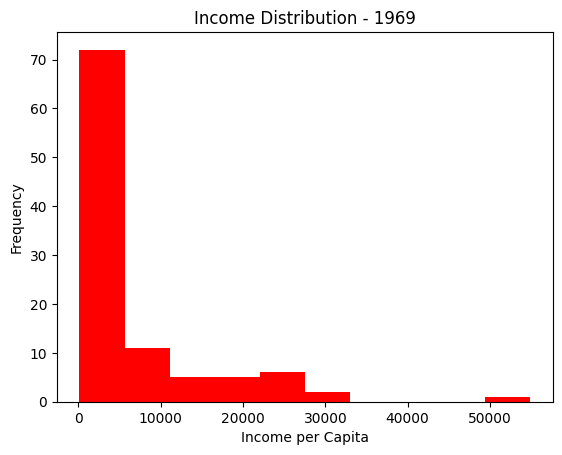

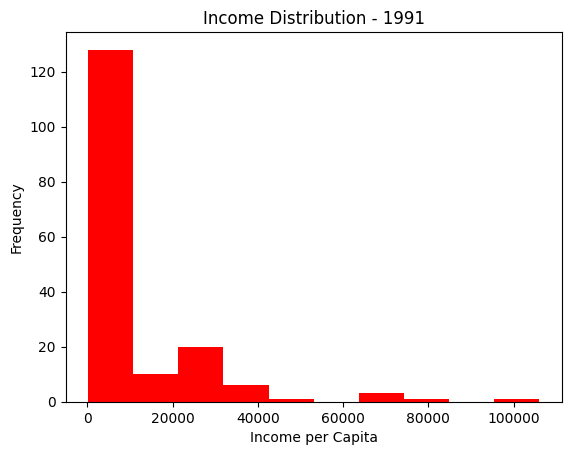

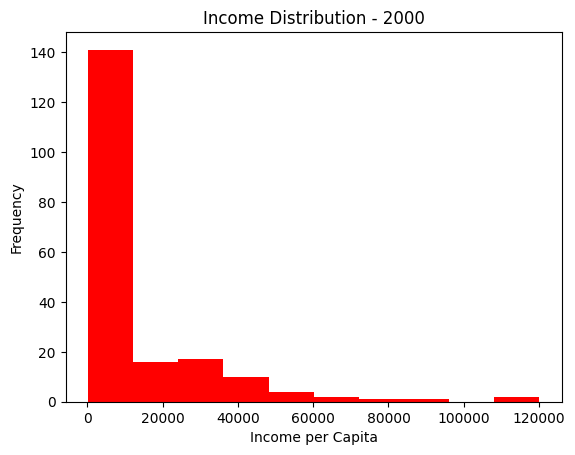

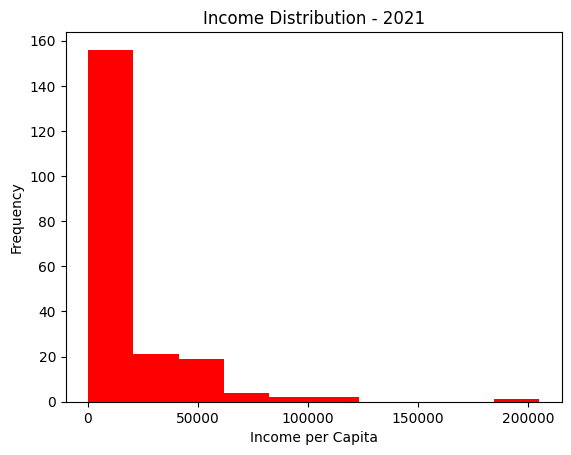

In [8]:
plot_income_per_year_hist(1969)
plot_income_per_year_hist(1991)
plot_income_per_year_hist(2000)
plot_income_per_year_hist(2021)


#### Income distribution
We can see that the income distribution has stably been uneven between the countries over the century. However, the trends show historical growth in 40-80 percentiles - in 1961 less countries were in these percentiles than in 2000 or 2021.

#### Income change
As for the growth, we see that the overall IpC has doubled in the time period of 1961-2021

### Task 1.C

First we visually check the data and see differcency in the name of the "Country" column, so we first standartize the column name. Then we pairwise merge the three dataframes as shown in [Merging dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [9]:
def merge_dataframes(countries_data, income_data, life_expectancy_data):
    income_data.rename(columns={'country': 'Country'}, inplace=True)
    life_expectancy_data.rename(columns={'country': 'Country'}, inplace=True)
    return pd.merge(countries_data, income_data, on='Country').merge(life_expectancy_data, on='Country', suffixes=("_income", '_lex'))

### Task 1.D

First, we call the merge_dataframes from Task 1.C

In [10]:
merged_data = merge_dataframes(countries_data, income_data, life_expectancy_data)

Text(0, 0.5, 'Life Expectancy')

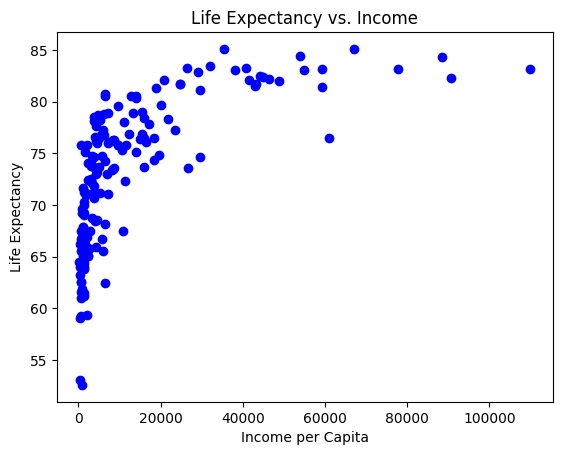

In [11]:
plt.scatter(merged_data['2021_income'], merged_data['2021_lex'], color='blue')
plt.title('Life Expectancy vs. Income')
plt.xlabel('Income per Capita')
plt.ylabel('Life Expectancy')

Based on the plot we can see strong positive exponential relationship between the two variables

### Task 1.E

First we get take the needed columns from the data

In [12]:
income_data_1960 = merged_data[["Country", "Region", "1960_income"]].dropna()
income_data_2010 = merged_data[['Country','Region', '2010_income']].dropna()

Then we draw the boxplot diagram

<Axes: title={'center': '1960_income'}, xlabel='Region'>

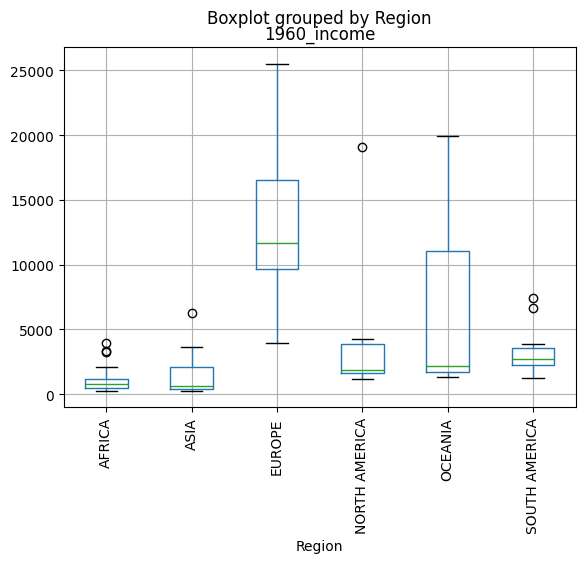

In [13]:
income_data_1960.boxplot(by='Region', column='1960_income', rot=90)

<Axes: title={'center': '2010_income'}, xlabel='Region'>

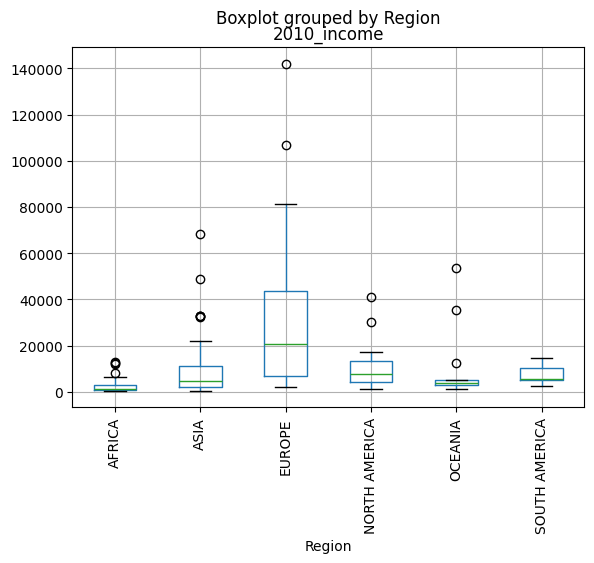

In [14]:
income_data_2010.boxplot(by='Region', column='2010_income', rot=90)

Since we see big difference in scales in the diagram, as well as strong outliers (e.g. USA in North America or Australia in the Oceania), we can do logarithmic rescaling

In [15]:
income_data_1960["log_1960"] = np.log(income_data_1960['1960_income'])
income_data_2010["log_2010"] = np.log(income_data_2010['2010_income'])

Now we can draw the boxplots of the new data

<Axes: title={'center': 'log_1960'}, xlabel='Region'>

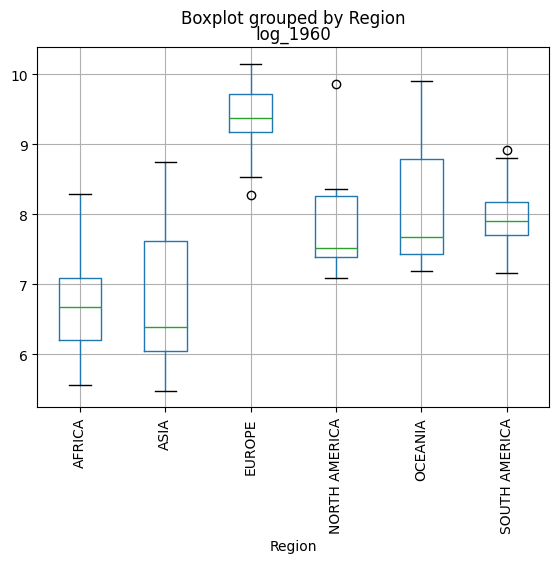

In [16]:
income_data_1960.boxplot(by='Region', column='log_1960', rot=90)

To find the outliers we check the folling:

In [17]:
print(income_data_1960[income_data_1960['Region'] == "EUROPE"].sort_values(by='1960_income', ascending=False).tail(1))
print(income_data_1960[income_data_1960['Region'] == "SOUTH AMERICA"].sort_values(by='1960_income', ascending=False).head(1))
print(income_data_1960[income_data_1960['Region'] == "NORTH AMERICA"].sort_values(by='1960_income', ascending=False).head(1))

      Country  Region  1960_income  log_1960
118  Portugal  EUROPE       3930.0  8.276395
       Country         Region  1960_income  log_1960
159  Argentina  SOUTH AMERICA       7410.0  8.910586
     Country         Region  1960_income  log_1960
128  Bahamas  NORTH AMERICA      19100.0  9.857444


Thus, the outliers in 1960 are Portugal, Argentina and the Bahamas.

<Axes: title={'center': 'log_2010'}, xlabel='Region'>

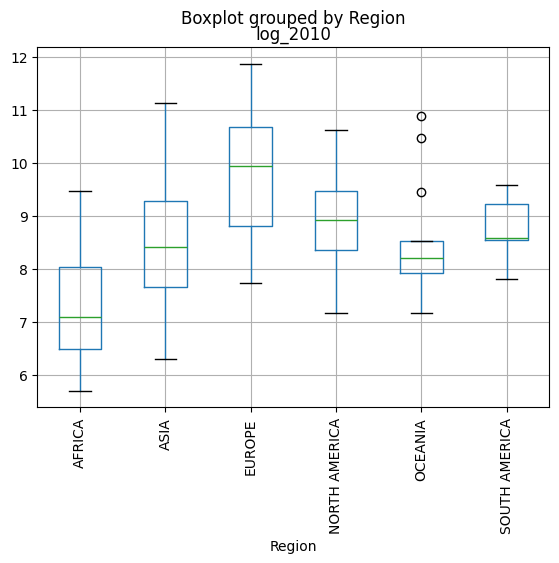

In [18]:
income_data_2010.boxplot(by='Region', column='log_2010', rot=90)

As for the 2010, we check:

In [19]:
print(income_data_2010[income_data_2010['Region'] == "OCEANIA"].sort_values(by='2010_income', ascending=False).head(3))

         Country   Region  2010_income   log_2010
146    Australia  OCEANIA      53600.0  10.889304
151  New Zealand  OCEANIA      35400.0  10.474467
152        Palau  OCEANIA      12600.0   9.441452


Thus, the outliers in 2010 are Australia, New Zealand and Palau

## Exercise 2

## Task 2.A


Load the file

In [20]:
olympics120 = pd.read_csv(open("./Data/athlete_events.csv", 'r'))

Filter the data

In [21]:
olympics120 = olympics120[olympics120['Season'] == 'Summer']

### Task 2.B

In [22]:
print(olympics120.describe())

                  ID            Age         Height        Weight  \
count  222552.000000  213363.000000  170695.000000  168698.00000   
mean    67998.925712      25.674053     175.515551      70.68906   
std     39139.038228       6.699839      10.914725      14.80394   
min         1.000000      10.000000     127.000000      25.00000   
25%     34000.750000      21.000000     168.000000      60.00000   
50%     68302.500000      24.000000     175.000000      70.00000   
75%    101881.000000      28.000000     183.000000      79.00000   
max    135568.000000      97.000000     226.000000     214.00000   

                Year  
count  222552.000000  
mean     1976.317094  
std        30.942802  
min      1896.000000  
25%      1956.000000  
50%      1984.000000  
75%      2000.000000  
max      2016.000000  


In [23]:
olympics120_height = olympics120.sort_values('Height', ascending=False)
olympics120_weight = olympics120.sort_values('Weight', ascending=False)
olympics120_age = olympics120.sort_values('Age', ascending=False)


In [24]:
print(f"Sports of the tallest players:\n {olympics120_height.head(10)['Sport']}\n")
print(f"Sports of the shortest players:\n {olympics120_height.tail(10)['Sport']}\n")
print(f"Sports of the heaviest players:\n {olympics120_weight.head(10)['Sport']}\n")
print(f"Sports of the lightest players:\n {olympics120_weight.tail(10)['Sport']}\n")
print(f"Sports of the oldest players:\n {olympics120_age.head(10)['Sport']}\n")
print(f"Sports of the youngest players:\n {olympics120_age.tail(10)['Sport']}\n")


Sports of the tallest players:
 265040    Basketball
265041    Basketball
265042    Basketball
32376     Basketball
207373    Basketball
207375    Basketball
207374    Basketball
17669     Basketball
59371     Basketball
59372     Basketball
Name: Sport, dtype: object

Sports of the shortest players:
 271000            Swimming
271003             Cycling
271005            Swimming
271010       Weightlifting
271030              Rowing
271031              Rowing
271034    Art Competitions
271038            Swimming
271075             Cycling
271100           Athletics
Name: Sport, dtype: object

Sports of the heaviest players:
 23155              Judo
23156              Judo
205467             Judo
75031         Wrestling
237039        Wrestling
237040        Wrestling
206352             Judo
206004             Judo
94363     Weightlifting
94362     Weightlifting
Name: Sport, dtype: object

Sports of the lightest players:
 270999            Swimming
271000            Swimming
271003     

### Task 2.C

First, let's import all needed the libraries

In [25]:
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


Next, filter data with the required fields

In [26]:
men_in_bgw = olympics120[(olympics120['Sex'] == 'M') & (olympics120['Sport'].isin(['Basketball', 'Gymnastics', 'Wrestling']))]

Draw the plot. Used the conversation at [stackoverflow](https://stackoverflow.com/questions/66290803/make-colors-in-seaborn-based-on-column-names) to distinguish colors by sports

In [27]:
def plot_weight_vs_height(df):
    sns.scatterplot(data=df, x='Weight', y='Height', hue='Sport')
    plt.title('Men in BGW - Weight vs Height')
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.show()


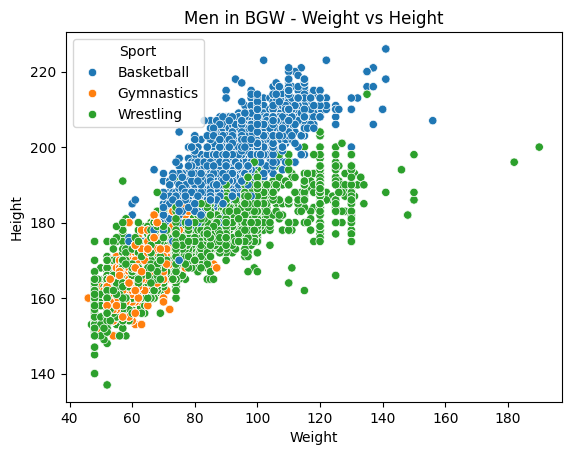

In [28]:
plot_weight_vs_height(men_in_bgw)

In [29]:
london_2012 = men_in_bgw[(men_in_bgw['Year'] == 2012) & (men_in_bgw['Season'] == 'Summer')]
rome_1960 = men_in_bgw[(men_in_bgw['Year'] == 1960) & (men_in_bgw['Season'] == 'Summer')]

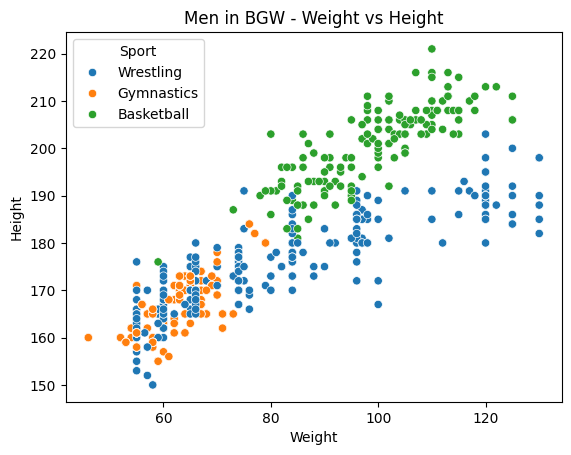

In [30]:
plot_weight_vs_height(london_2012)

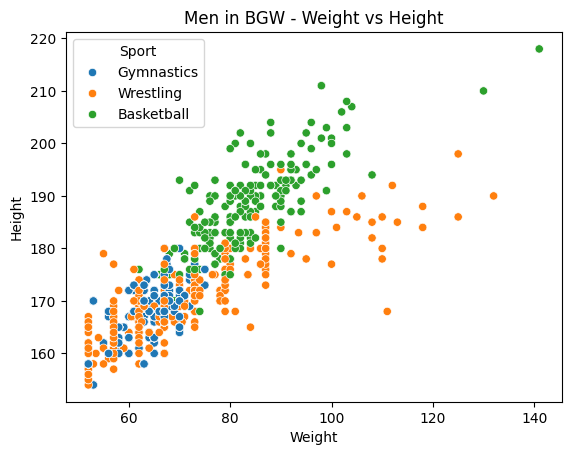

In [31]:
plot_weight_vs_height(rome_1960)

We see a strong positive correlation between the weight and the height of the atheletes. 

### Task 2.D
First we check the data and see that gold medals can be identified by word "Gold" in the Medal column and country codes can be found in the NOC collumn (not the team, since it's too specific in cases)

In [32]:
DataFramegolds = olympics120[olympics120['Medal'] == 'Gold']

In [33]:
gold_medals=DataFramegolds.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x)))

The code first takes filtered gold-medalist athletes and then groups them by country & year. This means that it creates groups for each unique pair of countries and years. After that, it counts these pairs and returns the final result.

## Works Cited
[Markdown basics](https://www.markdownguide.org/basic-syntax/)

[Merging dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

[stackoverflow](https://stackoverflow.com/questions/66290803/make-colors-in-seaborn-based-on-column-names) 